mse_linear的mse最小时所需要的降维为6,均方误差最小为0.05721385179924242
mse_poly的mse最小时所需要的降维为26,均方误差最小为0.05356035511363637


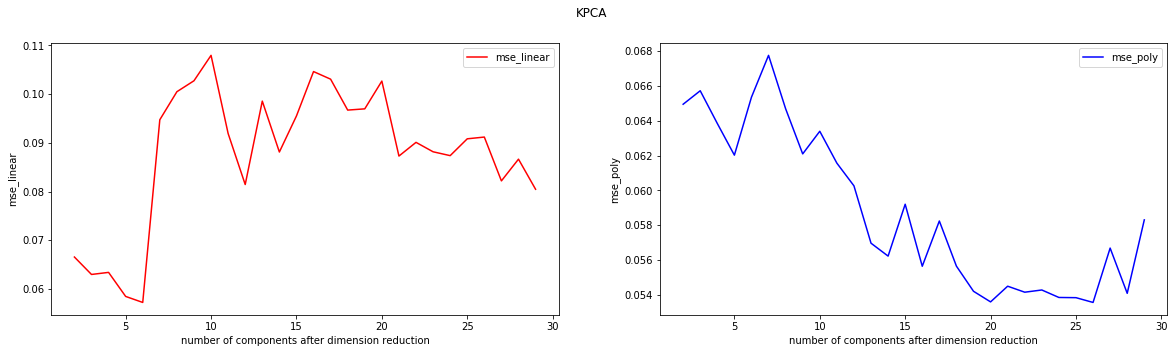

In [1]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
kernels=['linear','poly']
mse_linear = []
mse_poly = []
for i in kernels:
    for j in range(2,30):
        kpca=decomposition.KernelPCA(n_components=j,kernel=i)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        if i == "linear" :
            mse_linear.append(once * -1)
        if i == "poly" :
            mse_poly.append(once * -1)
      

color = ["red" , "blue"]       
fig = plt.figure(figsize=[20,5])
mse = [mse_linear , mse_poly ]
mse_char = ["mse_linear" , "mse_poly" ]
for i ,col in enumerate(mse) :
    ax = fig.add_subplot(1,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(2,30), col ,color = color[i] ,label = mse_char[i])
    ax.set_xlabel("number of components after dimension reduction")
    ax.set_ylabel(mse_char[i])
    ax.legend(loc="best")
    n = np.argmin(col)+2
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(mse_char[i],n,col[n-2]))
plt.suptitle("KPCA")
plt.show()       

gamma = 0.1的mse最小时所需要的降维为2,均方误差最小为0.060193624526515145
gamma = 0.5的mse最小时所需要的降维为4,均方误差最小为0.05327458570075758
gamma = 1的mse最小时所需要的降维为6,均方误差最小为0.057712606534090924
gamma = 4的mse最小时所需要的降维为6,均方误差最小为0.0576194081439394


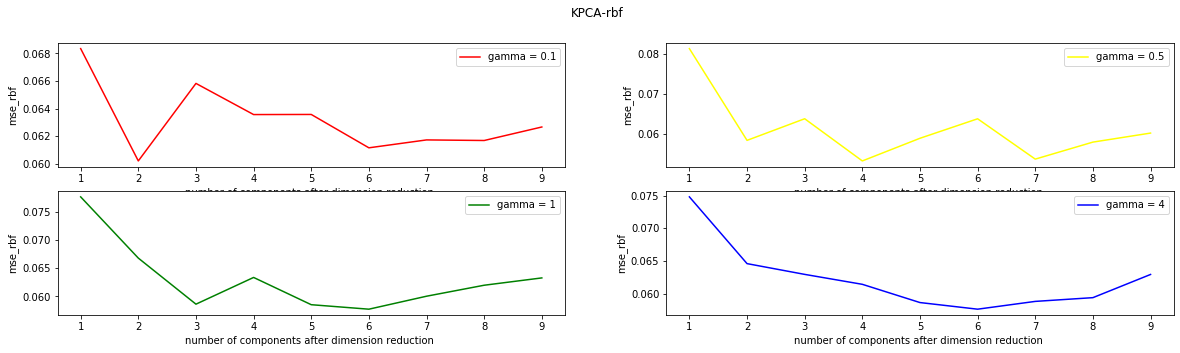

In [2]:
fig = plt.figure(figsize=[20,5])
colors = ["red" ,"yellow" ,"green" , "blue"]
Gammas=[0.1,0.5,1,4]
Gammas_char=["gamma = 0.1","gamma = 0.5","gamma = 1","gamma = 4"]# rbf 核的参数组成的列表。每个参数就是 gamma值
for i,gamma in enumerate(Gammas):
    mse_rbf = []
    for j in range(1,10):
        kpca=decomposition.KernelPCA(n_components=j,kernel='rbf',gamma=gamma)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        mse_rbf.append(once * -1)
    ax = fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(1,10), mse_rbf ,color = colors[i] ,label = Gammas_char[i])
    ax.set_xlabel("number of components after dimension reduction ")
    ax.set_ylabel("mse_rbf")
    ax.legend(loc="best")
    n = np.argmin(mse_rbf)+1
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(Gammas_char[i],n,mse_rbf[n-1]))
plt.suptitle("KPCA-rbf")
plt.show()